<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/DS2024_Lab02_22280049_VuDangKhoi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from math import radians, cos, sin, asin, sqrt

In [ ]:
df = pd.read_csv("Book1.csv").drop("No",axis=1)

# **Data Exploration**

In [ ]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Most of data of features is float

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


414 rows, 7 columns

In [ ]:
df.shape

(414, 7)

In [ ]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.rename(columns ={"X1 transaction date":"Transaction date","X2 house age":"House age",
"X3 distance to the nearest MRT station":"Distance to the nearest MRT station","X4 number of convenience stores":"Number of convenience stores",
"X5 latitude":"Latitude","X6 longitude":"Longitude","Y house price of unit area":"House prices"},inplace=True)

Data doesn't have missing values

In [ ]:
df.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House prices                           0
dtype: int64

In [ ]:
df['Number of convenience stores'].value_counts().sort_index()

Number of convenience stores
0     67
1     46
2     24
3     46
4     31
5     67
6     37
7     31
8     30
9     25
10    10
Name: count, dtype: int64

The more convinience stores are, the higher the house prices

In [ ]:
df.groupby('Number of convenience stores')['House prices'].mean()

Number of convenience stores
0     26.462687
1     31.839130
2     31.412500
3     29.536957
4     37.474194
5     44.729851
6     46.951351
7     43.848387
8     44.696667
9     51.732000
10    48.430000
Name: House prices, dtype: float64

People tend to buy house with price bewteen 25 to 50

<Axes: xlabel='House prices', ylabel='Count'>

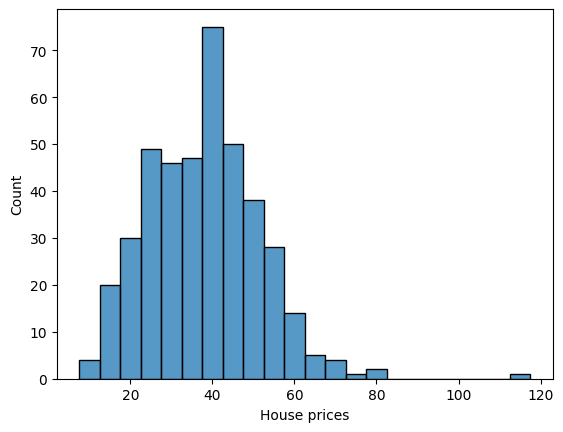

In [ ]:
sns.histplot(df['House prices'])


<Axes: ylabel='House prices'>

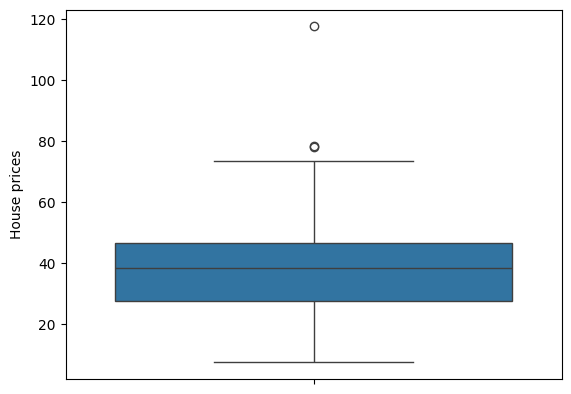

In [ ]:
sns.boxplot(df['House prices'])

There are 3 outliers in House prices

In [ ]:
sum(df['House prices']>77)

3

remove outliers

In [ ]:
df=df[df['House prices']<=77]

<Axes: ylabel='Distance to the nearest MRT station'>

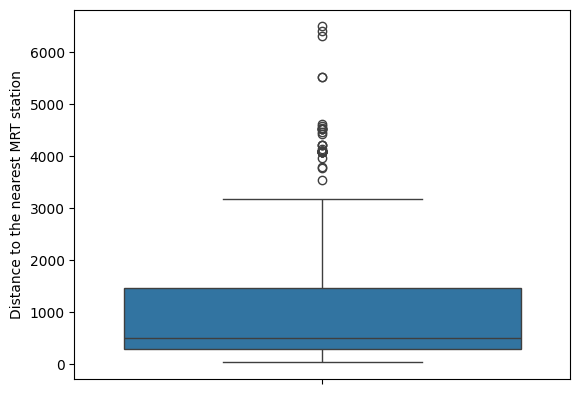

In [ ]:
sns.boxplot(df['Distance to the nearest MRT station'])

After identifying 38 outliers in the feature 'Distance to the nearest MRT station,' I chose to eliminate them from the dataset and conducted the analysis both with and without their inclusion. Surprisingly, the analysis performed better with the outliers included ==> these outliers might indeed hold legitimate significance in the data

In [ ]:
np.sum(df['Distance to the nearest MRT station']>3100)

38

People tend to buy houses which are not too far away from MRT station

<Axes: xlabel='Distance to the nearest MRT station', ylabel='Count'>

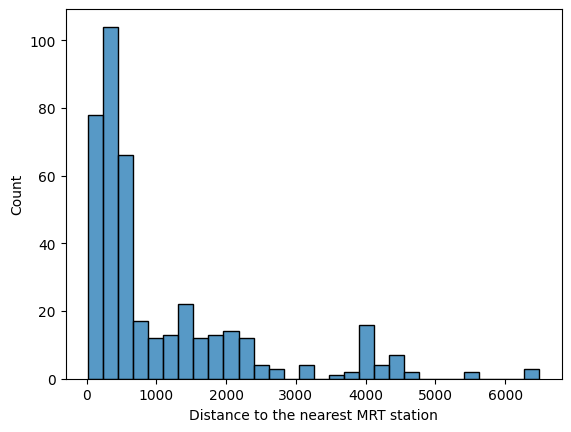

In [ ]:
sns.histplot(df['Distance to the nearest MRT station'], bins=30)

The more convinience stores are, the higher the house prices

<Axes: xlabel='Number of convenience stores', ylabel='House prices'>

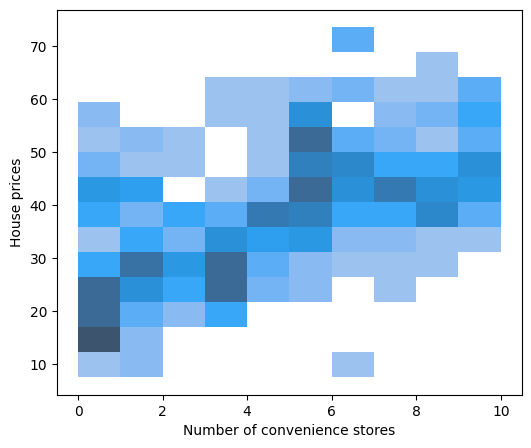

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(x=df['Number of convenience stores'],y=df['House prices'])

People tend to buy a house bewteen 0 to 20 years

<Axes: xlabel='House age', ylabel='Count'>

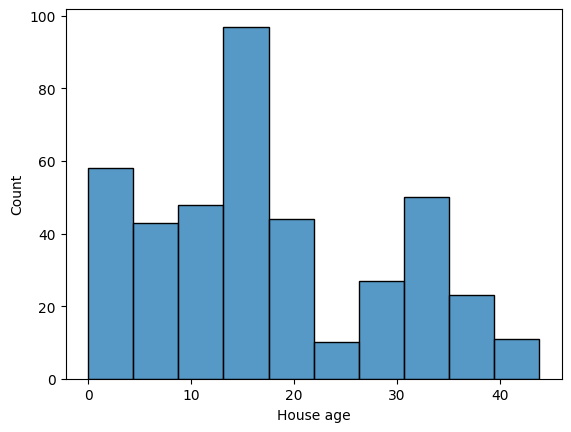

In [ ]:
sns.histplot(df['House age'])

People tend to buy houses in densely populated areas

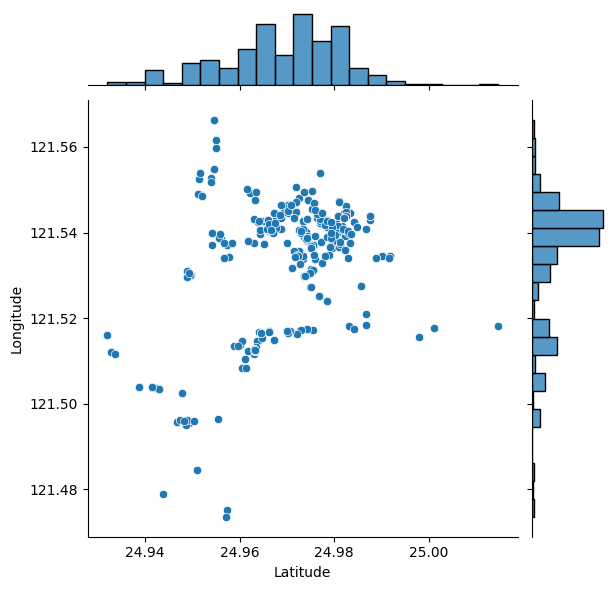

In [ ]:
sns.jointplot(x='Latitude', y='Longitude', data=df, kind='scatter')
plt.show()


House prices saw a slight increase depending on time

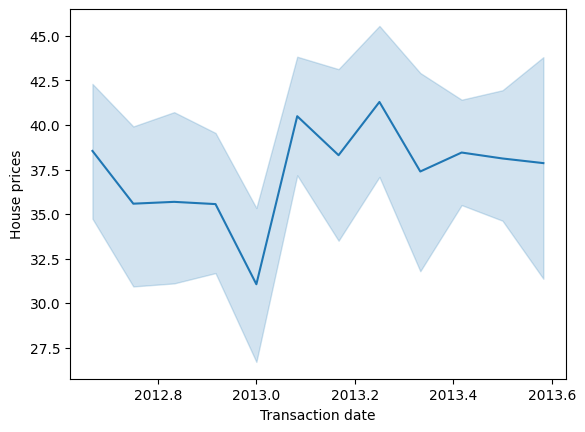

In [ ]:
sns.lineplot(data=df, x='Transaction date', y='House prices')
plt.show()

# **Feature Selection/Engineering:**

Haversine formula: calculates the shortest distance between two points on a sphere




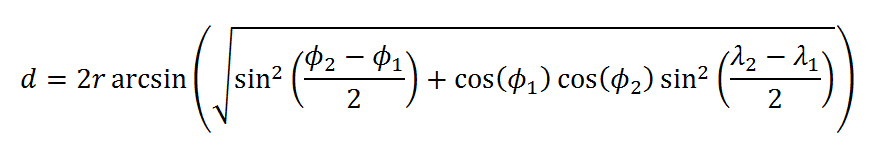

In [ ]:
def HaversineDistance(lat, lng, degrees=True):
    r= 6378 # Earth's radius (km)
    lat, lng = map(radians, [lat, lng])
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a))
    return d

In [ ]:
df['HaversineDistance'] = [HaversineDistance(x, y) for x, y in zip(df['Latitude'], df['Longitude'])]

<Axes: >

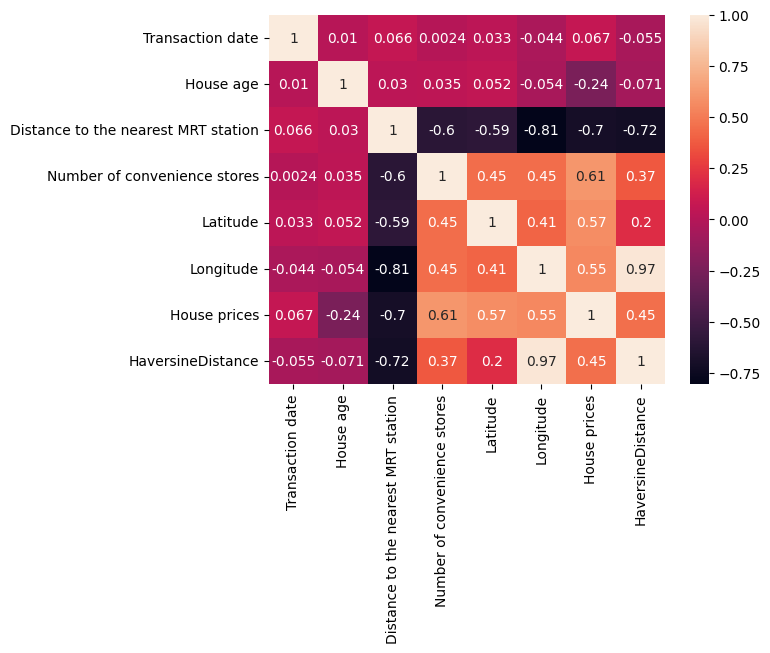

In [ ]:
cor=df.corr()
sns.heatmap(cor, annot=True)

I can see the correlation bewteen  transaction data and  house price of unit area is nearby 0 => not a linear relationship as well as the correlation bewteen Longtude and harvesine_distance is extreme high =>Multicollinearity. So dropping these features

In [ ]:
df.drop(['Transaction date'],axis=1,inplace=True)
df.drop(['Longitude'],axis=1,inplace=True)

# **Data Preprocessing**

In [ ]:
X=df.drop(['House prices'],axis=1).values
y=df['House prices'].values.reshape(-1,1)

# **Model Training**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

To prevent a bad result, we ensure that the training data isn't exposed to the testing data when using the model to predict real-world data.

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
model_LR=LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression()

# **Model Evaluation**

In [ ]:
y_pred=model_LR.predict(X_train)
MSE(y_pred,y_train)

53.02343962881884

In [ ]:
y_pred_test=model_LR.predict(X_test)
MSE(y_pred_test,y_test)

86.17892972171703

In [ ]:
evaluate_model={
    "Mean Squared Error":MSE,
    "Mean Absolute Error":MAE,
    "R-squared":R2
}
def evaluate(y,y_pred,evaluate_model):
  result=[]
  for names,method in evaluate_model.items():
    result.append({
        "Method":names,
        "Result":method(y_pred,y)
    })
  return pd.DataFrame(result,columns=['Method','Result'])
evaluate(y_train,y_pred,evaluate_model)

,Method,Result
0,Mean Squared Error,53.023440
1,Mean Absolute Error,5.424334
2,R-squared,0.481540


The result is not satisfactory despite employing various methods of evaluation

Residual plot

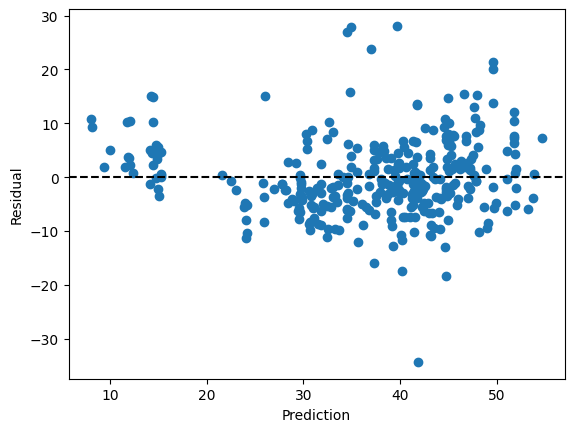

In [ ]:
plt.scatter(y_pred,y_train-y_pred)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.show()

We can see that :
Heteroscedastic data (points at widely varying distances from the line).

Data that is non-linearly associated.

Data sets with outliers.

=> model is not good enough

In [ ]:
pca = PCA(n_components=1)  # use PCA to easier visualize
X_new=pca.fit_transform(X_train)

In [ ]:
model = LinearRegression()
model.fit(X_new, y_train)
x_range = np.linspace(X_new.min(), X_new.max(), len(X_new)).reshape(-1, 1)
y_pred = model.predict(x_range)

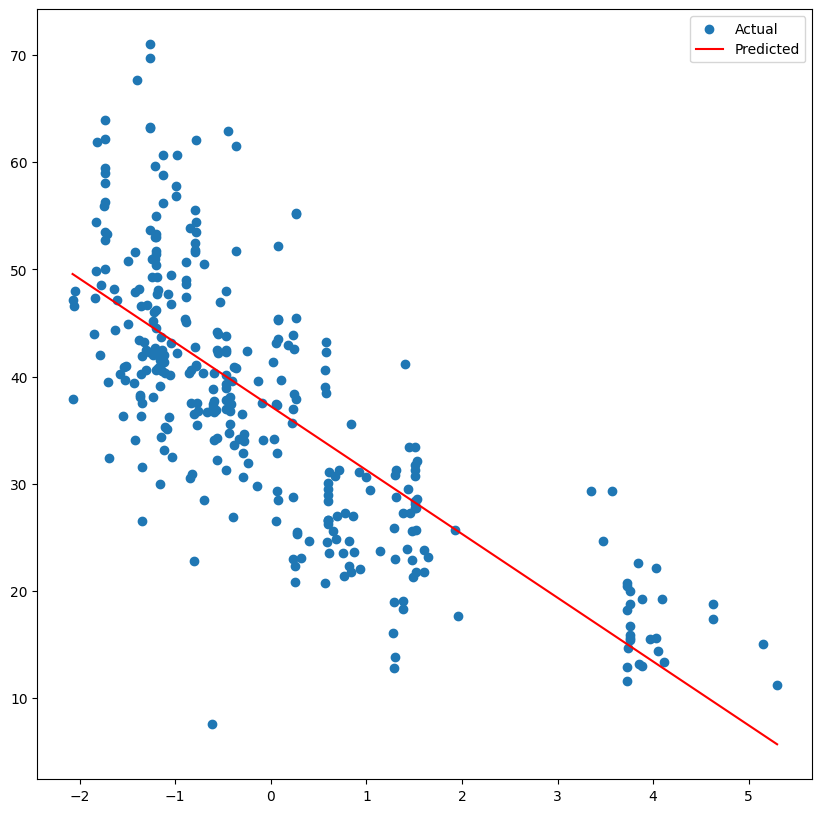

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_new[:,0],y_train, label='Actual')
plt.plot(x_range,y_pred, label='Predicted', color='red')
plt.legend()
plt.show()

Data is not far complex for accurate prediction

I use validation to test whether the model is overfitting.

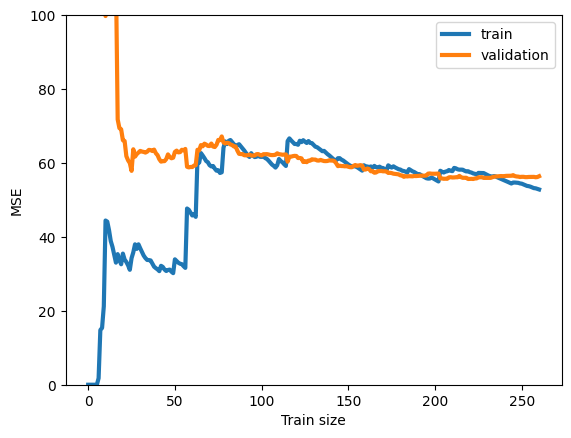

In [ ]:
def plot_learning_curves(model, X, y):
  X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)
  train_score=[]
  val_score=[]
  for m in range(1,len(X_train)):
    model.fit(X_train[:m],y_train[:m])
    y_pre_train=model.predict(X_train[:m])
    y_pre_val=model.predict(X_val)
    train_score.append(MSE(y_pre_train,y_train[:m]))
    val_score.append(MSE(y_pre_val,y_val))
  plt.plot(train_score,linewidth=3,label="train")
  plt.plot(val_score,linewidth=3,label="validation")
  plt.xlabel('Train size')
  plt.ylabel('MSE')
  plt.ylim(0,100)
  plt.legend()
  plt.show()

plot_learning_curves(LinearRegression(),X_train,y_train)




The train size higher than 80 has the results on the training data do not deviate too much from those on the validation data.

# **Hyperparameter Tuning**

In [ ]:
degrees=[2,3,4,5]
for d in degrees:
  pipeline = Pipeline([
        ("polynomial_features", PolynomialFeatures(degree=d)),
        ("regressor", LinearRegression()),
    ])
  pipeline.fit(X_train,y_train)
  y_pred=pipeline.predict(X_train)
  y_pred_te=pipeline.predict(X_test)
  print(f"Mean square error  with degree {d} in trainning:",MSE(y_pred,y_train))
  print(f"Mean square error  with degree {d} in testing:",MSE(y_pred_te,y_test))


Mean square error  with degree 2 in trainning: 35.39879918705041
Mean square error  with degree 2 in testing: 57.75531102717137
Mean square error  with degree 3 in trainning: 42.287257065191504
Mean square error  with degree 3 in testing: 60.75158200183546
Mean square error  with degree 4 in trainning: 16.054901326505306
Mean square error  with degree 4 in testing: 4006.0257933767825
Mean square error  with degree 5 in trainning: 4.073271554899225
Mean square error  with degree 5 in testing: 137812419.53382576


As the degree increases, the likelihood of overfitting also increases. I realize that degree 2 is the best with smallest errors  in both trainning and testing as well as not overfitting

In [ ]:
models={
      "LinearRegression":{
          "model":LinearRegression(),
          "parameter":{
              "poly__degree":[2,4],
              "linear__positive":[True,False],

              }
      },
      "Ridge":{
          "model":Ridge(),
          "parameter":{
              "poly__degree":[2,4],
              "linear__alpha":[0.01,0.1],

              }
      },
      "Lasso":{
          "model":Lasso(),
          "parameter":{
              "poly__degree":[2,4],
              "linear__alpha":[0.01,0.1],}

      },
      "ElasticNet":{
          "model":ElasticNet(),
          "parameter":{
              "poly__degree":[2,4],
              "linear__l1_ratio":[0,0.5],

          }
      },
  }

In [ ]:
def find_best_model1(X,y,models):
  best_model=[]
  for names,s in models.items():
    model=s["model"]
    model.fit(X_train,y_train)
    best_model.append({
        "model":names,
        "MSE":MSE(model.predict(X_train),y_train)
        })
  return pd.DataFrame(best_model,columns=['model','MSE'])

In [ ]:
find_best_model1(X,y,models)

,model,MSE
0,LinearRegression,53.023440
1,Ridge,53.024359
2,Lasso,55.718926
3,ElasticNet,60.872196


Lasso, Ridge, ElasticNet are regularized regression techniques. Consequently, the score in LinearRegression tends to be lower as it doesn't incorporate regularization. Elasticnet is highest because of combining L1  and L2 penalties of the lasso and ridge methods. Plus, Ridge  helps to reduce the risk of overfitting; Lasso helps for feature selection and ElasticNet balances feature selection and regularization

In [ ]:
def find_best_model2(X,y,models):

  cv = ShuffleSplit(5,random_state=42)
  best_model=[]
  for names,s in models.items():
    pipeline = Pipeline([
        ("poly", PolynomialFeatures()),
        ("linear", s["model"])])
    grid = GridSearchCV(pipeline,s["parameter"],cv=cv,scoring='neg_mean_squared_error',return_train_score=False)
    grid.fit(X,y)
    best_model.append(
        {
            'model':names,
            'best_score':-grid.best_score_,
            #Scikit-Learn cross-validation features expect a utility function
            #(greater is better) rather than a cost function (lower is better), so
            #the scoring function is actually the opposite of the MSE (i.e., a neg‐
            #ative value), which is why the preceding code computes -scores
            #before calculating the square root.
            'best_param':grid.best_params_,
             'time':np.mean(grid.cv_results_['mean_fit_time'])

        }
    )
  return pd.DataFrame(best_model,columns=['model','best_score','best_param','time'])

In [ ]:
find_best_model2(X_train,y_train,models)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.328e+03, tolerance: 4.568e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+03, tolerance: 4.547e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.309e+03, tolerance: 4.625e

,model,best_score,best_param,time
0,LinearRegression,46.845977,"{'linear__positive': False, 'poly__degree': 2}",0.006428
1,Ridge,46.392167,"{'linear__alpha': 0.1, 'poly__degree': 2}",0.003561
2,Lasso,43.224364,"{'linear__alpha': 0.1, 'poly__degree': 2}",0.023426
3,ElasticNet,51.635625,"{'linear__l1_ratio': 0, 'poly__degree': 4}",0.023377


The score is lower than before.This could be due to a perfect grid search or my data being seen during cross-validation. Additionally,  We can see the best_score of Lasso is lowest

Because I've chosen a degree of 2  with lowest errors in both trainning and testing as well as not overfitting ,I don't need Ridge and ElasticNet for regularization. So Lasso regression is my best model choice

# **Conclusion and Further Analysis:**

Summary :

Despite not overfitting and underfitting, the result is still high and not good enough

Since the data exhibits non-linearity, choosing degree 2 is the best with smallest errors in both trainning and testing as well as not overfitting

Ridge  helps to reduce the risk of overfitting; Lasso helps for feature selection and ElasticNet balances feature selection and regularization

Lasso is the lowest in MSE







 Limitations or Assumptions:

 The dataset is insufficient; the model should be trained on a larger volume of data to ensure it learns diverse patterns and makes precise predictions aligned with real-world data
  
  The dataset doesn't have enough features to lead high complexity of model

  Since PCA is sensitive to the scale of features, I've opted to use StandardScaler to normalize the data. However, I've decided to retain some outliers due to the legitimate  outliers. It's worth noting that StandardScaler may not be appropriate for datasets containing outliers, as the scaling process relies on mean and standard deviation, making outliers disproportionately influential
  
  House prices is not a linear trend, therefore using linear regression with degree 1 is not suitable. The result when using polynomial model is good, but it can lead overfitting

Because of having transaction date, we can use it for time-series data and don't need to drop it

We can use RMSE to evaluate model result, because it is much more straightforward
for instance we are talking about the residual of hosing prices as opposed to square of the residual of hosing prices

Using cross-validation helps ensures model robustness and reliability, early detection of errors ,assesses model performance on unseen data . By contrast, model can see all data


In grid search, setting fixed hyperparameters can introduce a level of uncertainty. When hyperparameters aren't optimal, the results can be compromised. This may lead to suboptimal performance






  Potential avenues for further analysis or model improvement:
  
  Utilizing web crawling techniques to gather additional data and extract relevant features

 Using LSTM for time-series data

 Using of ensemble methods to combine the predictions of multiple models.

 Based on latitude and longitude can use KNN to cluster people. For example: densely populated  areas tend have higher housing prices,while sparsely populated area tend to have lower housing prices.

 Using A/B test to test multiple features simultaneously to see which yields the best results

 Using SHAP  to understand the contributions of each input feature to the model's predictions

Since I plan to use a Q-Q plot rather than PCA to evaluate the model, I will opt for RobustScaler instead of StandardScaler. Given the small size of the dataset, RobustScaler not only scales numerical features but also effectively handles outliers

I will opt for Random search instead of Grid search. Random search is appropriate for discovering new hyperparameter values or new combinations of hyperparameters, often resulting in better performance, although it may take more time to complete.

Since the data exhibits non-linearity, employing Kernel PCA would be suitable

